In [75]:
#install.packages("ggplot2")
#install.packages("dplyr")
library(ggplot2)
library(dplyr)
library(reshape2)


In [76]:
travel <- read.csv("TravelTrain.csv", header=T, sep=",")
survey <- read.csv("SurveyTrain.csv", header=T, sep=",")
full <- merge(survey,travel,by.x="ID",by.y="ID")
nonfactors = c("ID", "Age", "Travel_Distance", "DepartureDelay_in_Mins", "ArrivalDelay_in_Mins")
factors = -which(names(full) %in% nonfactors)
full[, factors] = lapply(full[, factors], as.factor)


In [77]:
num_rows_with_na <- sum(apply(full, 1, function(row) any(is.na(row))))
num_rows_with_na

[1] 390

In [78]:
full_complete <- na.omit(full)
head(full_complete)

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,⋯,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,⋯,need improvement,poor,Female,Loyal Customer,52,,Business,272,0,5
2,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,⋯,good,good,Male,Loyal Customer,48,Personal Travel,Eco,2200,9,0
3,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,⋯,excellent,excellent,Female,Loyal Customer,43,Business travel,Business,1061,77,119
4,98800004,0,acceptable,Ordinary,need improvement,,need improvement,acceptable,need improvement,acceptable,⋯,acceptable,acceptable,Female,Loyal Customer,44,Business travel,Business,780,13,18
5,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,⋯,good,good,Female,Loyal Customer,50,Business travel,Business,1981,0,0
6,98800006,1,need improvement,Ordinary,need improvement,acceptable,need improvement,good,excellent,good,⋯,acceptable,acceptable,Male,Loyal Customer,44,Business travel,Business,2810,0,0


In [79]:
num_rows_with_na <- sum(apply(full_complete, 1, function(row) any(is.na(row))))
num_rows_with_na

[1] 0

In [80]:
full_complete <- full_complete[ , !(names(full_complete) %in% c("ID"))]
head(full_complete)


,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,⋯,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,⋯,need improvement,poor,Female,Loyal Customer,52,,Business,272,0,5
2,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,⋯,good,good,Male,Loyal Customer,48,Personal Travel,Eco,2200,9,0
3,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,⋯,excellent,excellent,Female,Loyal Customer,43,Business travel,Business,1061,77,119
4,0,acceptable,Ordinary,need improvement,,need improvement,acceptable,need improvement,acceptable,acceptable,⋯,acceptable,acceptable,Female,Loyal Customer,44,Business travel,Business,780,13,18
5,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,⋯,good,good,Female,Loyal Customer,50,Business travel,Business,1981,0,0
6,1,need improvement,Ordinary,need improvement,acceptable,need improvement,good,excellent,good,acceptable,⋯,acceptable,acceptable,Male,Loyal Customer,44,Business travel,Business,2810,0,0


## Data Cleaning

In [81]:
empty_vals <- sapply(full_complete, function(x) x == "")
colSums(empty_vals)

rows_to_keep <- apply(empty_vals, 1, function(row) !any(row))
                      
shinkansen_data <- full_complete[rows_to_keep, ]
                      
colSums(sapply(shinkansen_data, function(x) x == ""))

Overall_Experience            Seat_comfort              Seat_Class 
                      0                      61                       0 
Arrival_time_convenient                Catering       Platform_location 
                   8891                    8702                      30 
    Onboardwifi_service   Onboard_entertainment          Online_support 
                     30                      18                      91 
     Onlinebooking_Ease         Onboard_service                Leg_room 
                     73                    7569                      90 
       Baggage_handling         Checkin_service             Cleanliness 
                    142                      77                       6 
        Online_boarding                  Gender            CustomerType 
                      6                      47                    8888 
                    Age              TypeTravel            Travel_Class 
                      0                    9161                       0 
        Travel_Distance  DepartureDelay_in_Mins    ArrivalDelay_in_Mins 
                      0                       0                       0

Overall_Experience            Seat_comfort              Seat_Class 
                      0                       0                       0 
Arrival_time_convenient                Catering       Platform_location 
                      0                       0                       0 
    Onboardwifi_service   Onboard_entertainment          Online_support 
                      0                       0                       0 
     Onlinebooking_Ease         Onboard_service                Leg_room 
                      0                       0                       0 
       Baggage_handling         Checkin_service             Cleanliness 
                      0                       0                       0 
        Online_boarding                  Gender            CustomerType 
                      0                       0                       0 
                    Age              TypeTravel            Travel_Class 
                      0                       0                       0 
        Travel_Distance  DepartureDelay_in_Mins    ArrivalDelay_in_Mins 
                      0                       0                       0

## EDA/Visualizations to check for balanced data


        0         1 
0.4531106 0.5468894 

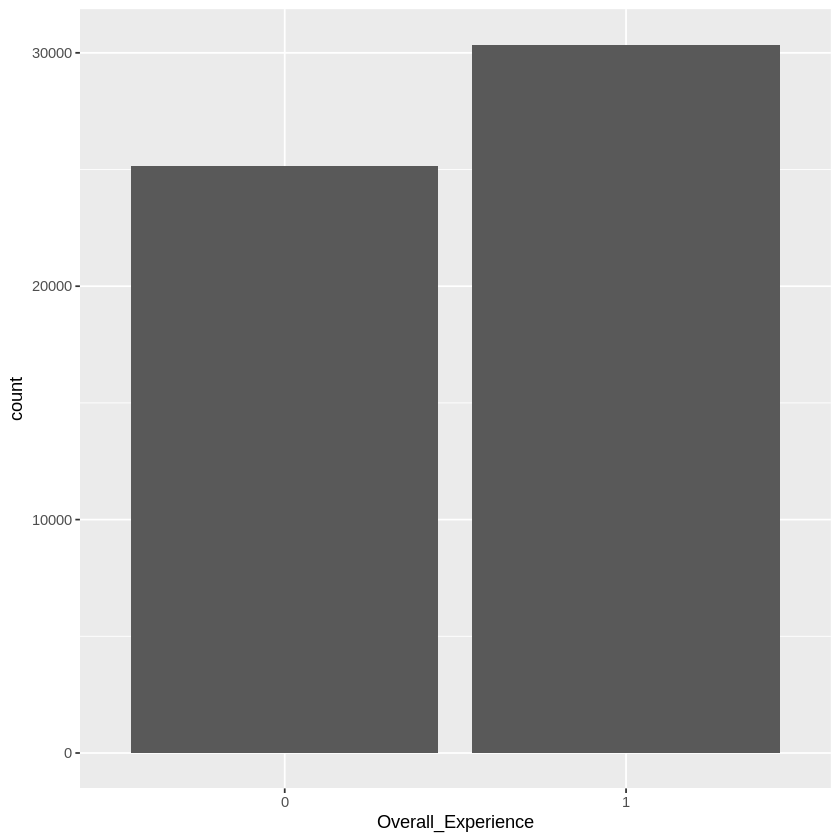

In [82]:
# Bar graph to see distribution of response variable (overall experience)
experience <- ggplot(shinkansen_data, aes(x = Overall_Experience)) +
  geom_bar()
experience

proportions <- prop.table(table(shinkansen_data$Overall_Experience))
prop_table

In [83]:
# There is a relatively even distribution of overall experiences, with proportions of about 45% and 55%, so the dataset is balanced, and there is no need to undersample/oversample any data

In [84]:
# Bar plots to see distributions of numerical variables

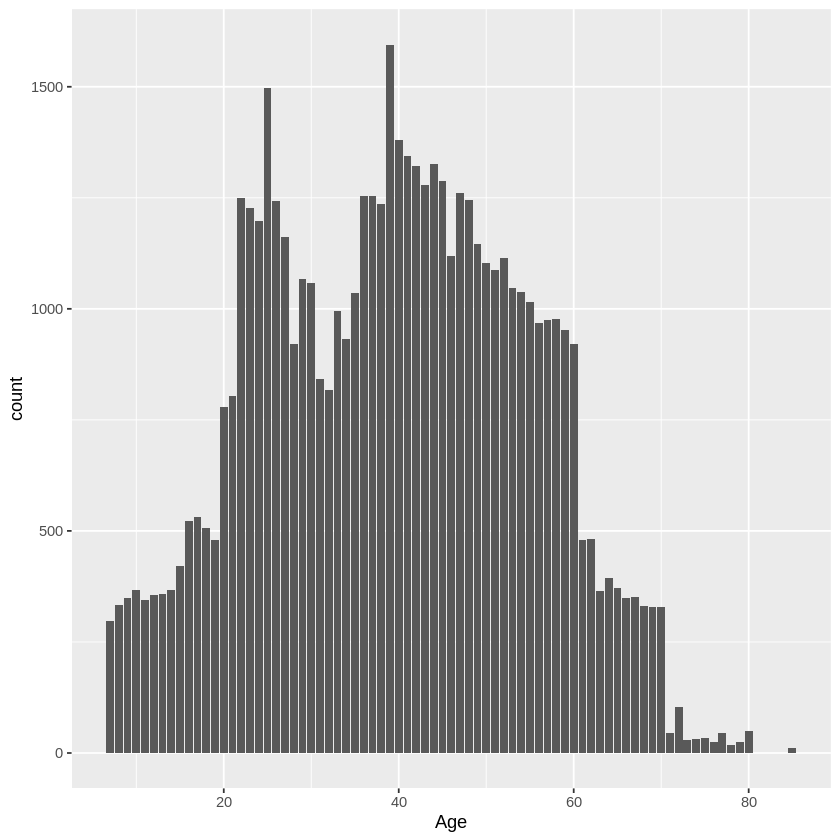

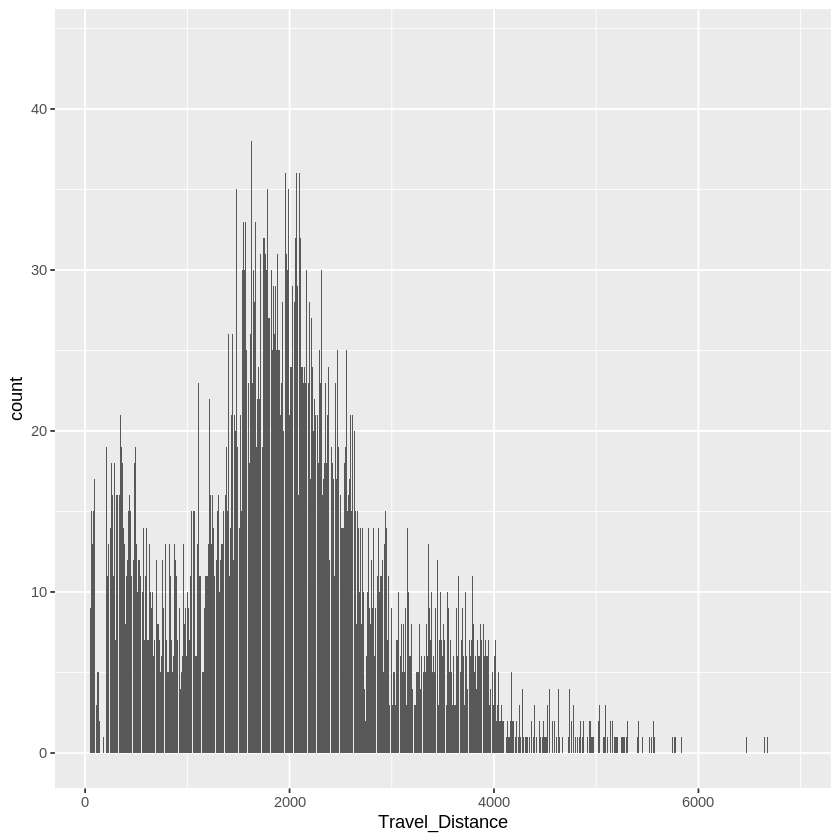

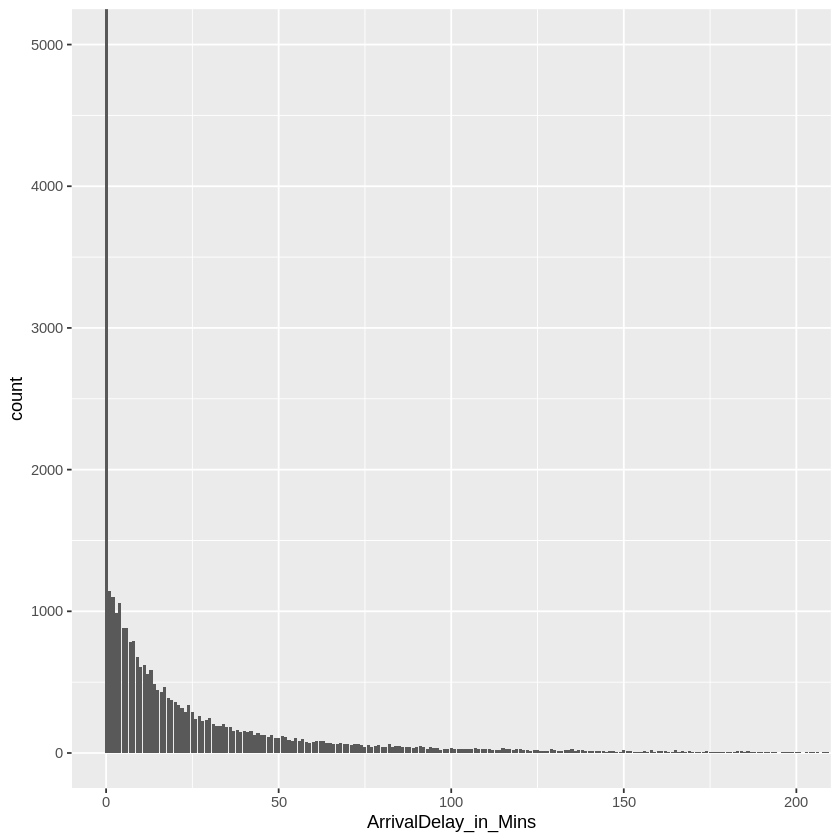

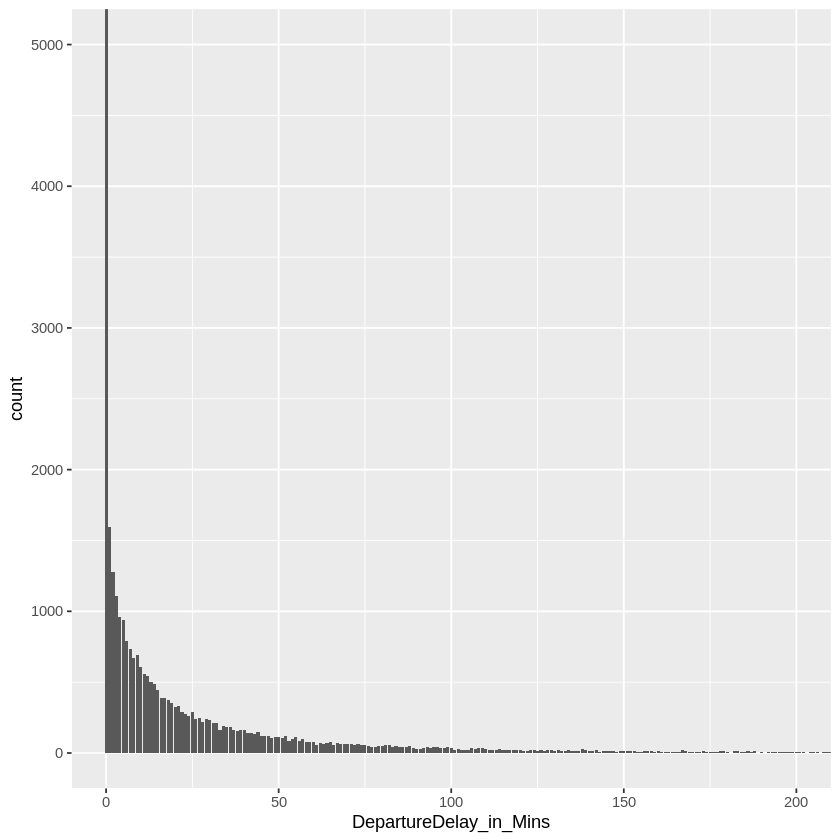

In [85]:
plot1 <- ggplot(shinkansen_data, aes(x = Age)) + geom_bar() 
plot2 <- ggplot(shinkansen_data, aes(x = Travel_Distance)) + geom_bar()
plot3 <- ggplot(shinkansen_data, aes(x = ArrivalDelay_in_Mins)) + 
  geom_bar() + 
  coord_cartesian(xlim = c(0, 200), ylim = c(0, 5000))
plot4 <- ggplot(shinkansen_data, aes(x = DepartureDelay_in_Mins)) + 
  geom_bar() + 
  coord_cartesian(xlim = c(0, 200), ylim = c(0, 5000))

plot1
plot2
plot3
plot4

In [86]:
# The age and travel distance values follow a roughly normal distribution, with the majority of ages being between 25-60 and the majority of distances being between 1000 and 3000.
# The distributions of arrival delay and deparature delay look quite similar, we can plot them against each other to check for a linear relationship 

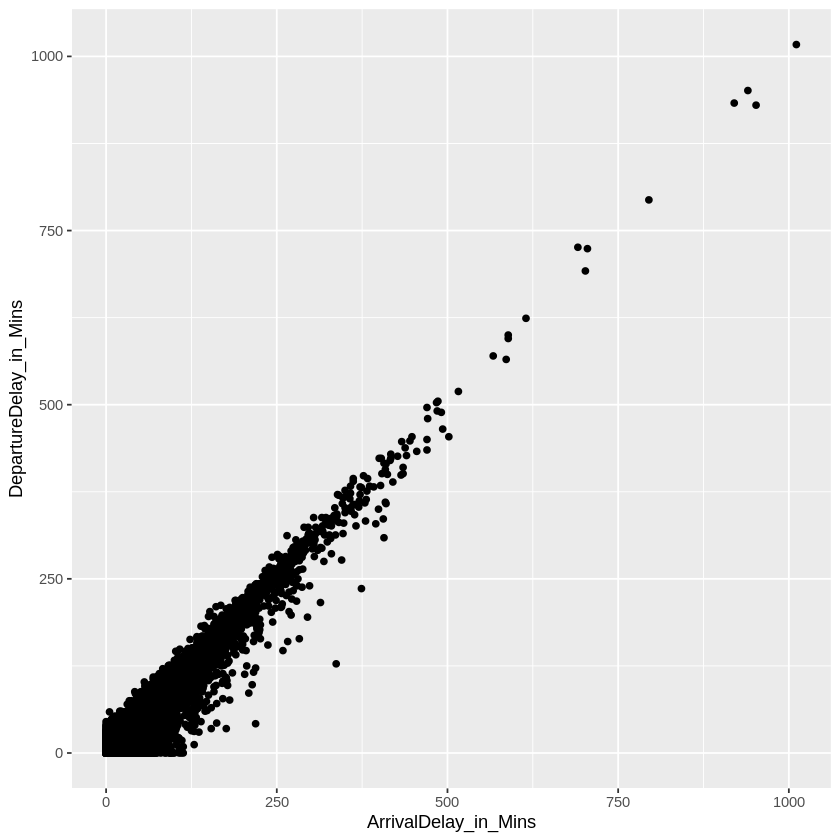

In [87]:
# Scatterplot of arrival delay vs departure delay
delays <- ggplot(shinkansen_data, aes(x = ArrivalDelay_in_Mins, y = DepartureDelay_in_Mins)) +
  geom_point()
delays


In [88]:
# these look quite positively correlated, so it is likely we will remove one of the variables during feature selection

## Checking the distribution of the types of customers, to see if data is skewed or not

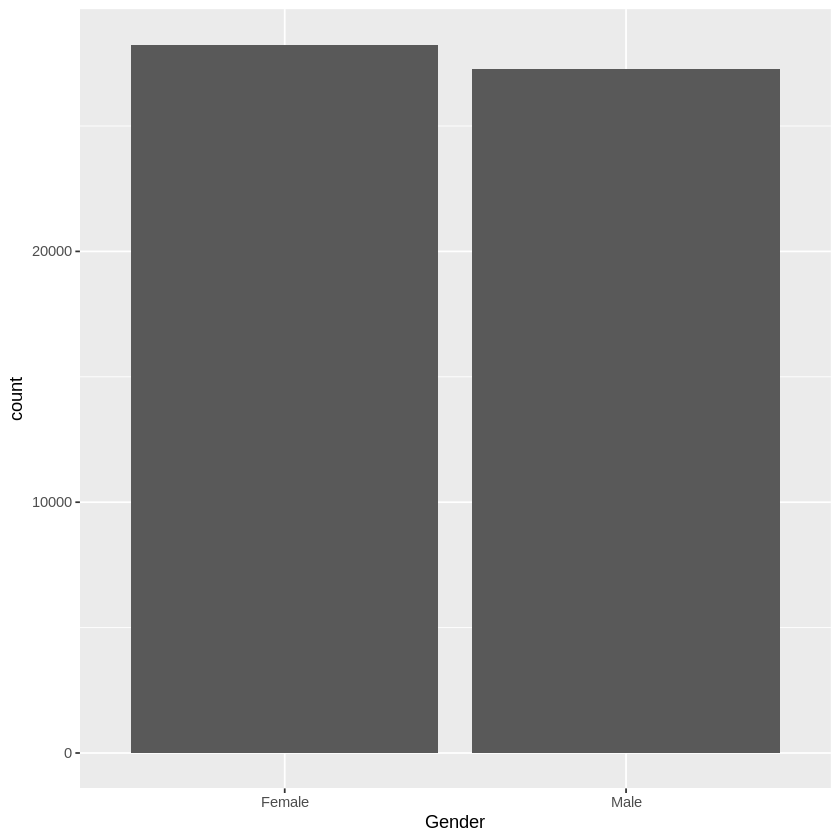

In [89]:
# Checking counts of gender
gender <- ggplot(shinkansen_data, aes(x = Gender)) +
  geom_bar()
gender

In [90]:
# The distribution of Female vs Males seems roughly equal

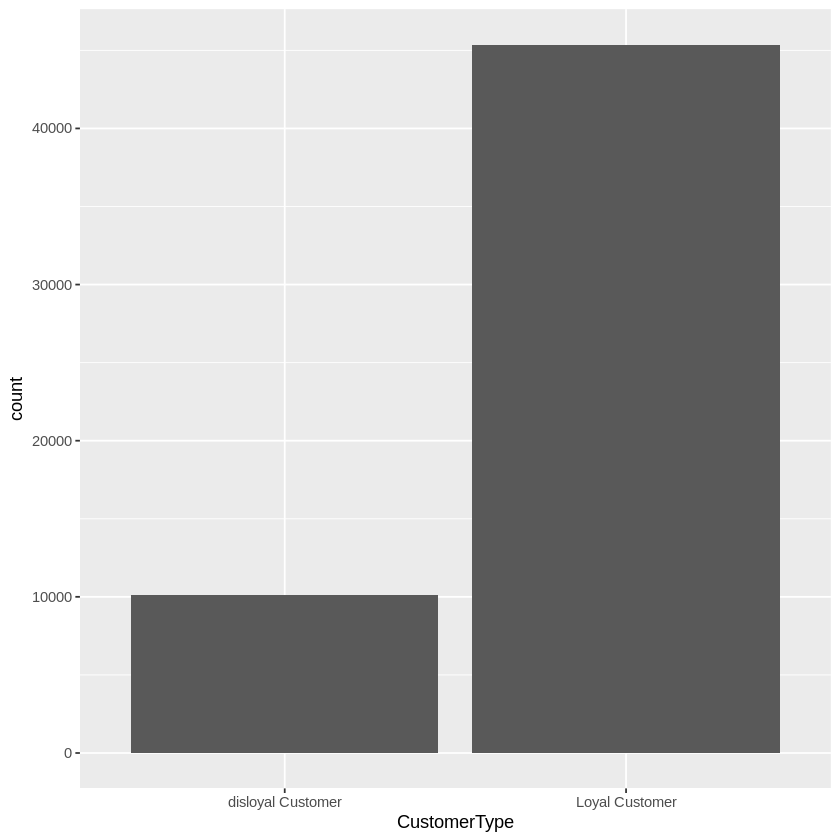

In [91]:
# checking counts of customer type
customer_type <- ggplot(shinkansen_data, aes(x = CustomerType)) +
  geom_bar()
customer_type


In [92]:
# There seems to be an imbalance in the type of customer. Having more loyal customers may skew data, in terms of the frequency of these customers giving their surveys, as well as their overall opinion of the system.
# We can do a quick check to see if this imbalance is shown in the overall experience (response variable)

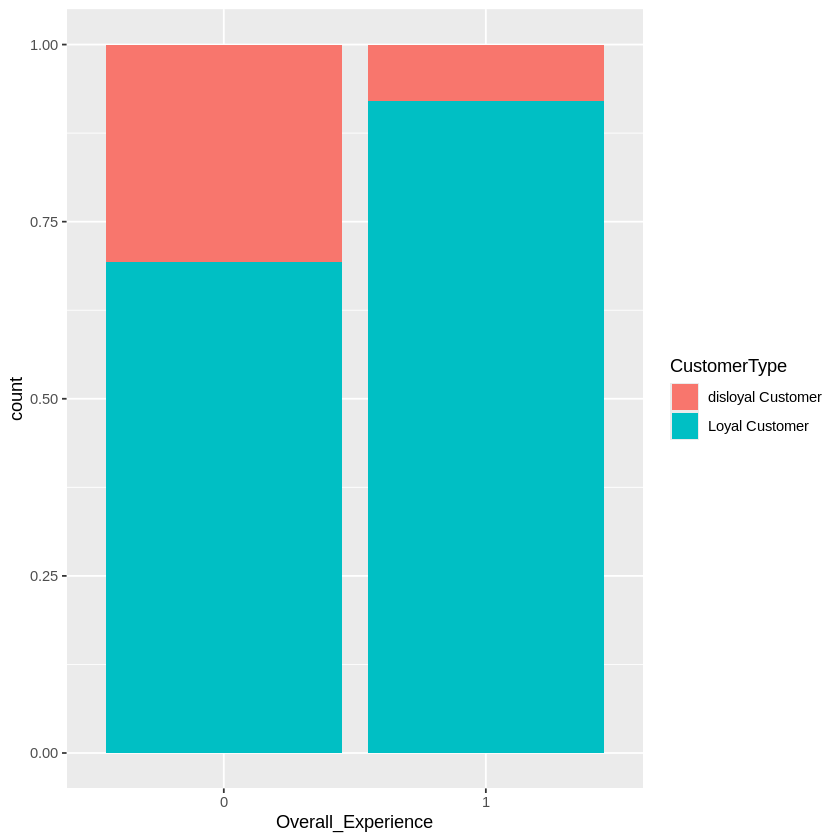

In [93]:
# plotting proportions of loyal and disloyal customers in the responses
ggplot(shinkansen_data,aes(x = Overall_Experience,fill = CustomerType)) + 
    geom_bar(position = "fill")

In [94]:
# it does appear that more loyal customers have a better experience overall, but this isn't an enormous difference, so it appears the imbalance of customer type won't be skewing the results too badly

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,Age,Age,1.00
2,Travel_Distance,Age,-0.25
3,DepartureDelay_in_Mins,Age,-0.01
4,ArrivalDelay_in_Mins,Age,-0.01
5,Age,Travel_Distance,-0.25
6,Travel_Distance,Travel_Distance,1.00


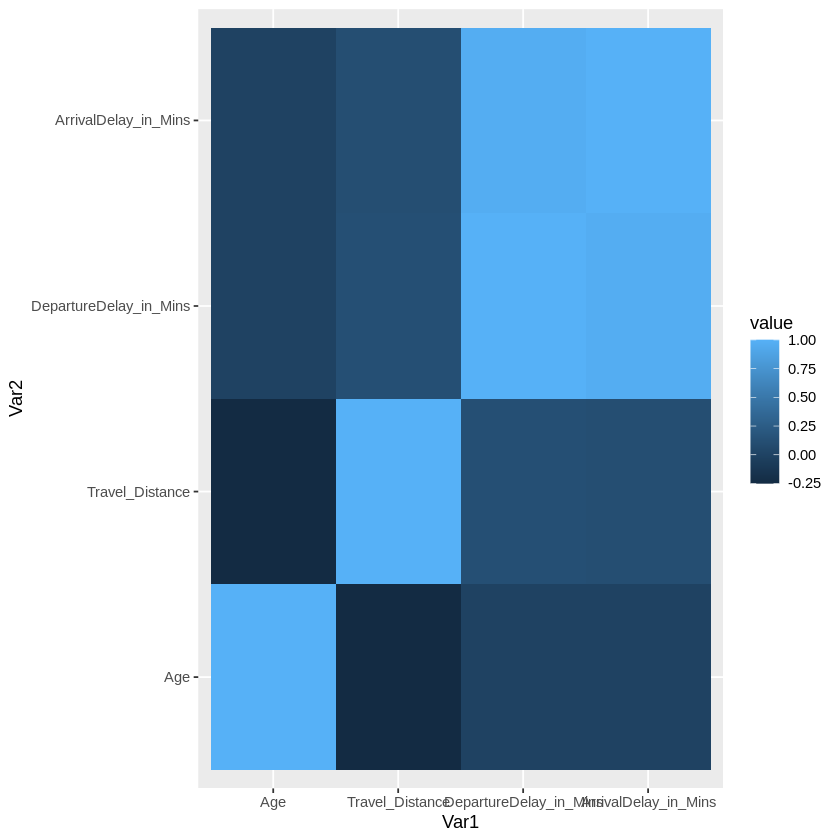

In [95]:
# This is optional - because we already have the numerical table we might not need this visual version
# Correlation heatmap to check for multicollinearity in the numerical variables

numerical_data <- shinkansen_data[c("Age", "Travel_Distance", "DepartureDelay_in_Mins", "ArrivalDelay_in_Mins")]
cormat <- round(cor(numerical_data, use="complete.obs"), 2)  # use="complete.obs" to handle missing values

melted_cormat <- melt(cormat)
head(melted_cormat)

library(ggplot2)
ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile()